# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [4]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [9]:
books = pd.read_parquet("./goodsread/books.parquet")

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [12]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [13]:
interactions = pd.read_parquet("./goodsread/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [15]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [17]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [20]:
books.sample(3).T

,2187030,510871,1022730
book_id,13456414,79378,6425
author,Steven L. Peck,James Patterson,"Janet Evanovich, Lorelei King"
title,A Short Stay in Hell,"Roses are Red (Alex Cross, #6)","Hard Eight (Stephanie Plum, #8)"
description,"An ordinary family man, geologist, and Mormon,...",In this heart-pounding but touchingly romantic...,Fugitive Apprehension Agent Stephanie Plum has...
genre_and_votes,"{'Fiction': 116, 'Fantasy': 56, 'Horror': 31, ...","{'Mystery': 589, 'Fiction': 374, 'Thriller': 3...","{'Mystery': 2063, 'Fiction': 680, 'Humor': 558..."
num_pages,104,416,326
average_rating,4.17,4.02,4.17
ratings_count,1252,44933,94068
text_reviews_count,334,929,1705
publisher,Strange Violin Editions,Warner Vision,


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [22]:
books["book_id"].nunique()

43312

/var/folders/bx/8n6_vdf94z7gqkmk97lf4mnh0000gn/T/ipykernel_73770/2874937594.py:10: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)


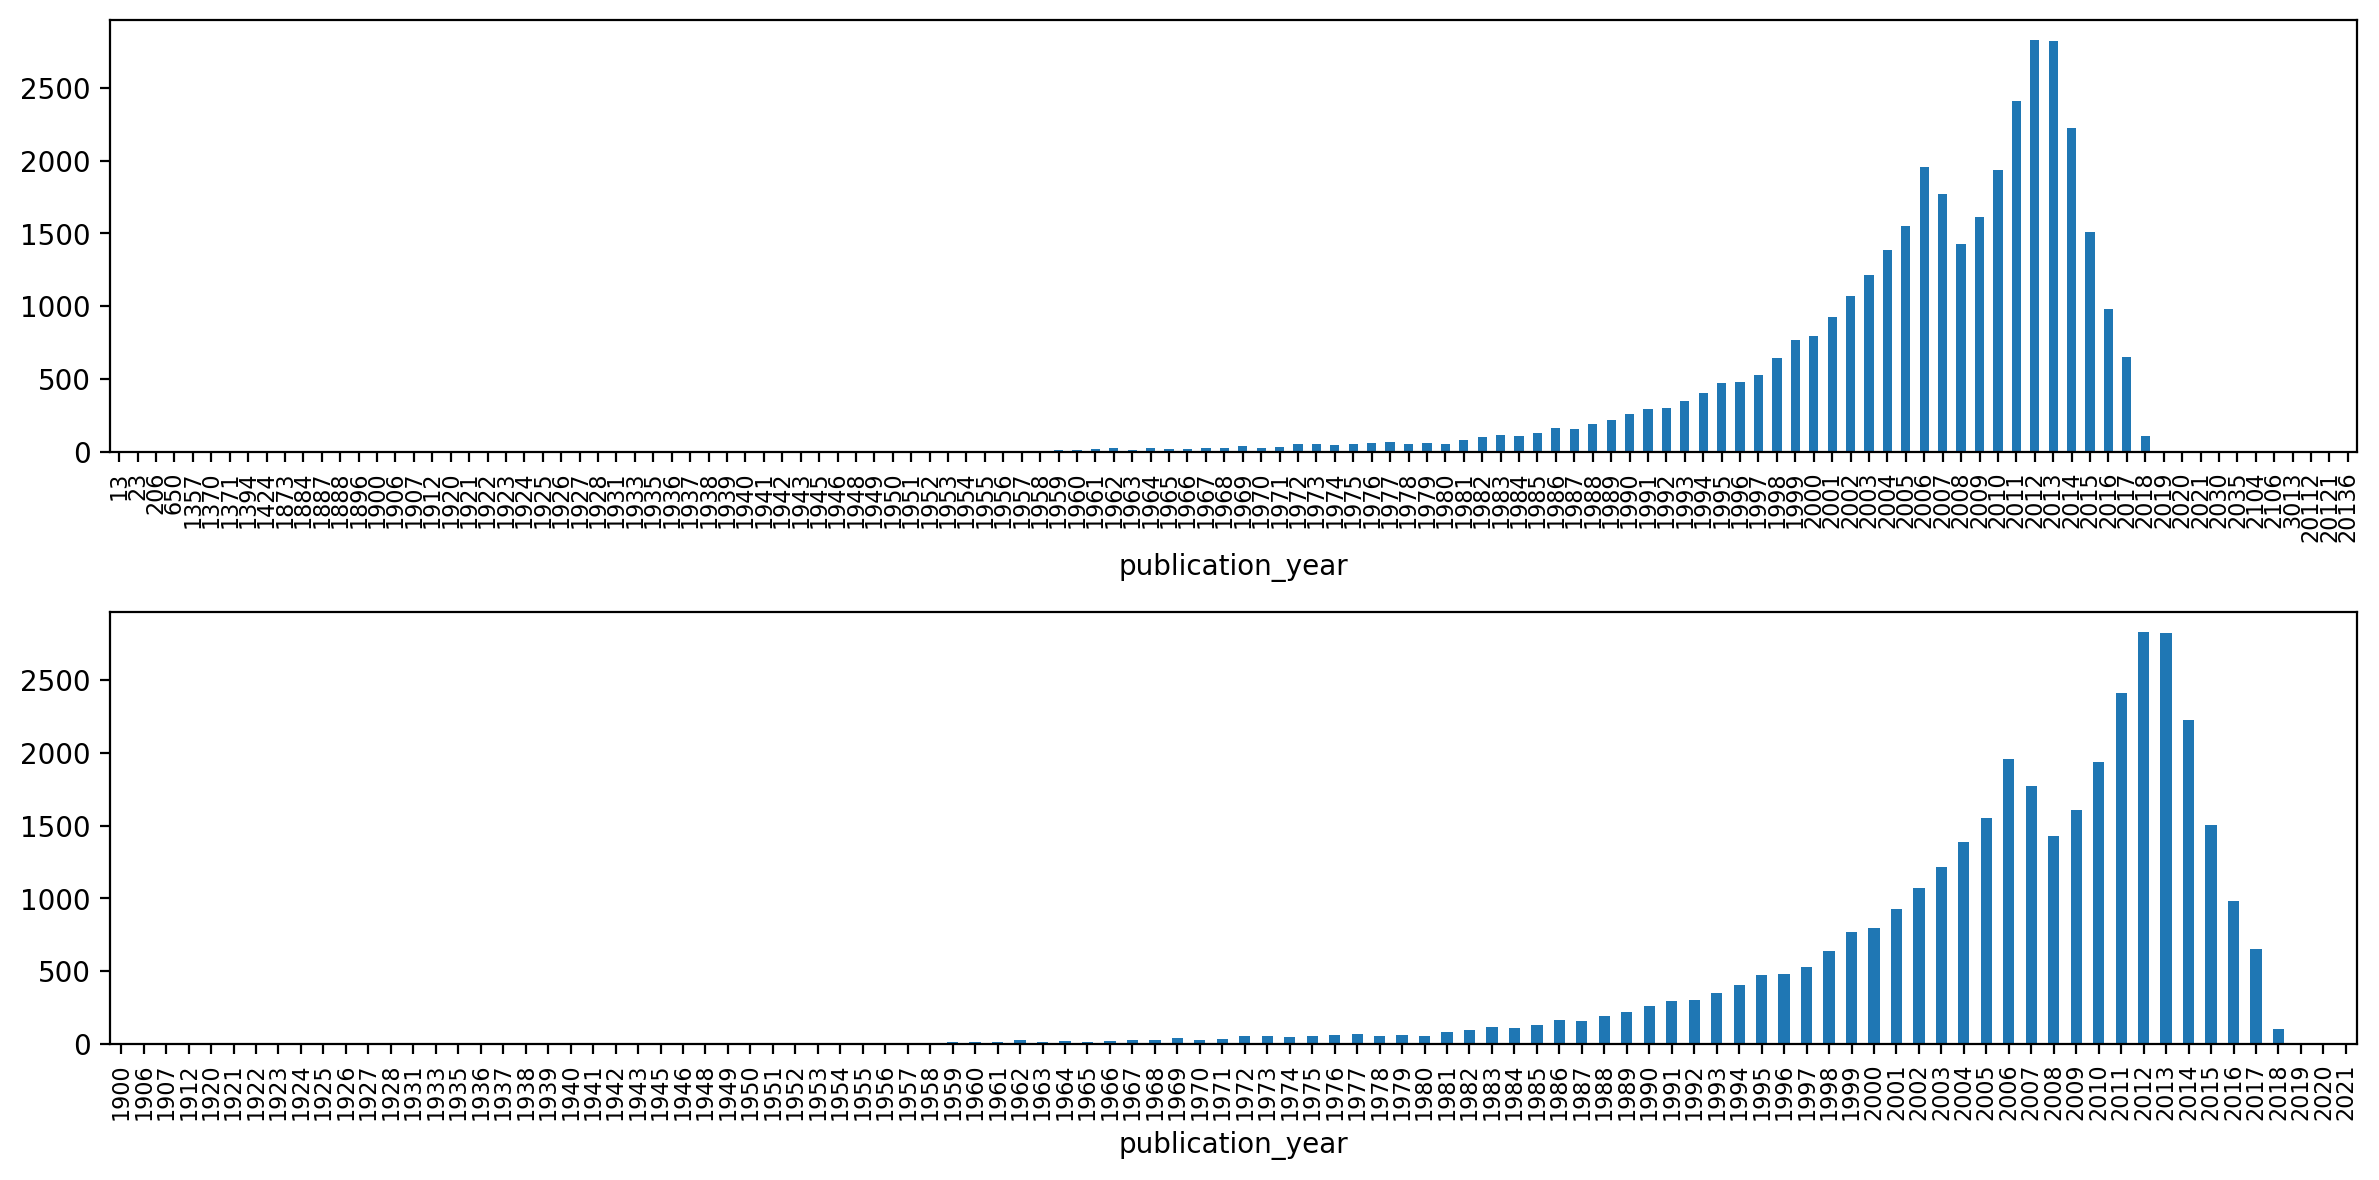

In [23]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [25]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [26]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [27]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


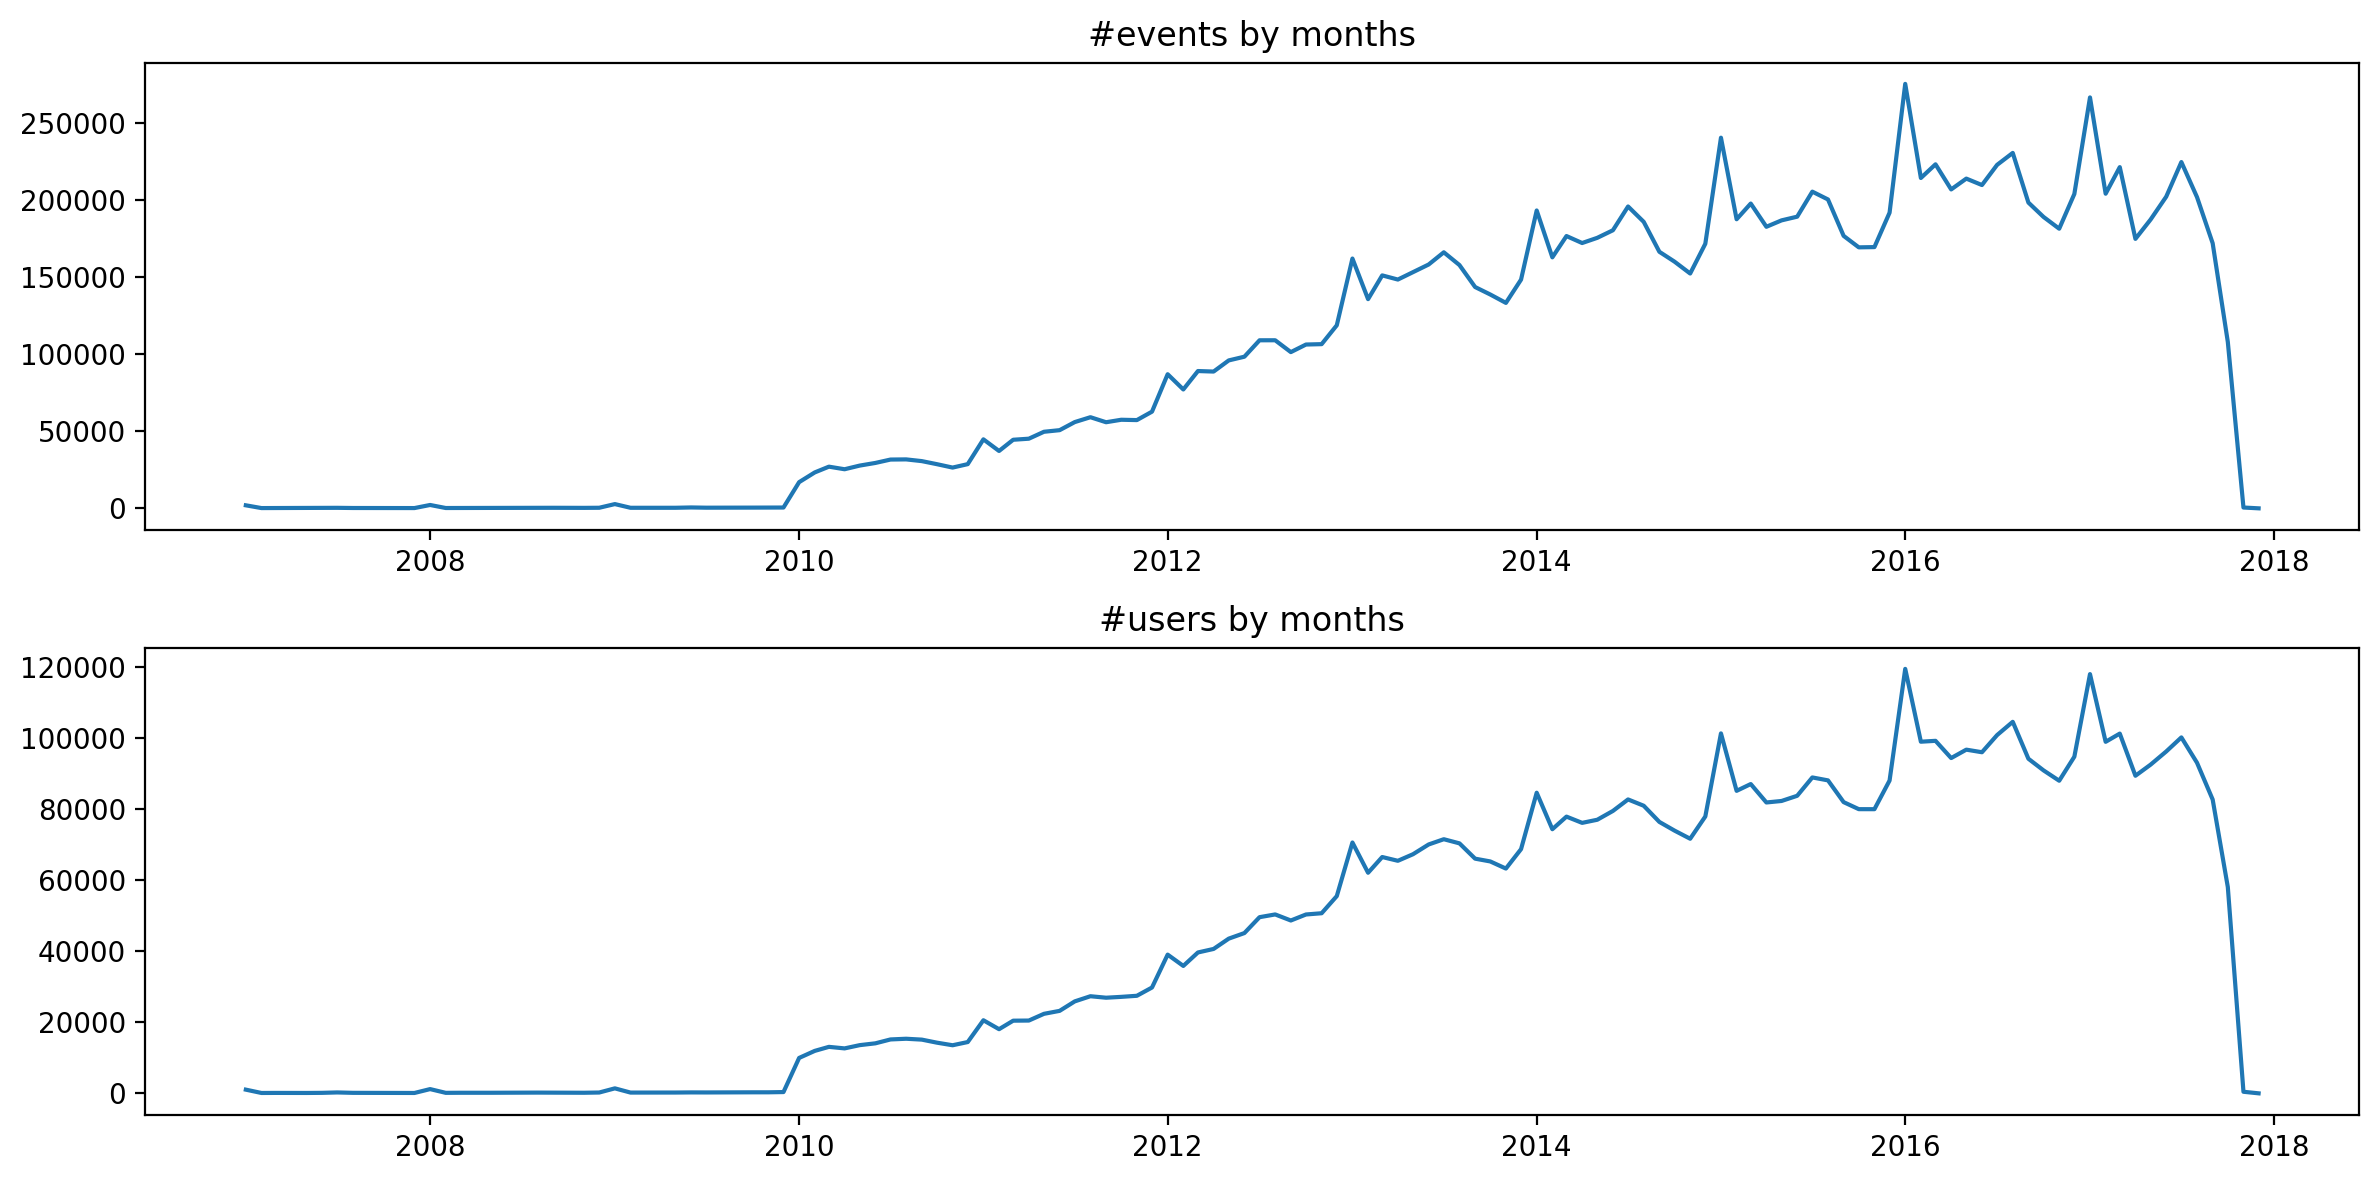

In [28]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [31]:
items = books.copy()
events = interactions.copy()

In [32]:
del books
del interactions

In [64]:
# Шаг 1: Фильтрация событий до 1 ноября 2017 года
event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

In [65]:
# Шаг 2: Удаление событий без рейтинга
events = events[events['rating'] != 0]

In [67]:
# Шаг 3: Оставить только события с признаком is_read=True
events = events[events['is_read'] == True]

In [70]:
# Шаг 4: Оставить только пользователей, у которых две и более прочитанные книги
user_counts = events['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index
events = events[events['user_id'].isin(valid_users)]

In [72]:
# Шаг 5: Переименование столбцов и таблиц
items.rename(columns={'book_id': 'item_id'}, inplace=True)
events.rename(columns={'book_id': 'item_id'}, inplace=True)

In [74]:
# Шаг 6: Перекодировка идентификаторов пользователей в числовой вид
unique_user_ids = sorted(events['user_id'].unique())
user_id_mapping = {old_id: new_id for new_id, old_id in enumerate(unique_user_ids, start=1000000)}

# Применение новой кодировки к данным
events['user_id'] = events['user_id'].map(user_id_mapping)

# Ваш код здесь

In [76]:
events.head()

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
0,1229132,22034,2015-07-12,2015-07-17,True,5,False,2015-07-01
1,1229132,22318578,2015-06-07,2015-08-09,True,5,True,2015-06-01
2,1229132,22551730,2015-06-24,2015-07-11,True,4,True,2015-06-01
3,1229132,22816087,2015-09-27,2015-11-04,True,5,True,2015-09-01
5,1229132,17910054,2015-03-04,2015-07-28,True,3,False,2015-03-01


In [78]:
items.head()

,item_id,author,title,description,genre_and_votes,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_year,country_code,language_code,format,is_ebook,isbn,isbn13,genre_and_votes_dict,genre_and_votes_str
3,6066819,Jennifer Weiner,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}",368,3.49,51184,3282,Atria Books,2009,US,eng,Hardcover,False,0743294297,9780743294294,"{'Academic': None, 'Academic-Academia': None, ...","Womens Fiction-Chick Lit 739, Fiction 442"
6,378460,Michael Halberstam,The Wanting of Levine,,"{'Politics': 1, 'Humor': 1}",<NA>,4.38,12,4,Berkley Publishing Group,1979,US,,Paperback,False,0425040887,9780425040881,"{'Academic': None, 'Academic-Academia': None, ...","Politics 1user, Humor 1user"
15,89375,"Don Piper, Cecil Murphey",90 Minutes in Heaven: A True Story of Death an...,As he is driving home from a minister's confer...,"{'Christian': 395, 'Nonfiction': 392, 'Religio...",<NA>,3.91,68157,2885,,<NA>,US,,,False,0800759494,9780800759490,"{'Academic': None, 'Academic-Academia': None, ...","Christian 395, Nonfiction 392, Religion 142, S..."
16,89376,Randy Alcorn,Heaven,What is Heaven really going to be like? What w...,"{'Christian': 225, 'Religion-Theology': 154, '...",533,4.26,7345,566,,<NA>,US,eng,,False,0842379428,9780842379427,"{'Academic': None, 'Academic-Academia': None, ...","Christian 225, Religion-Theology 154, Nonficti..."
17,89377,Jennifer L. Holm,Penny from Heaven,It's 1953 and 11-year-old Penny dreams of a su...,"{'Historical-Historical Fiction': 284, 'Childr...",288,3.98,6949,615,Random House Books for Young Readers,2006,US,,Hardcover,False,037583687X,9780375836879,"{'Academic': None, 'Academic-Academia': None, ...","Historical-Historical Fiction 284, Childrens-M..."


In [80]:
# Определение нового идентификатора для конкретного пользователя
original_user_id = '8f50136afeb65c55cec7b3d306c24b03'

# Проверка, есть ли этот идентификатор в маппинге
print(user_id_mapping.get(original_user_id, None))

1241243


Код для разбиения всех событий. В качестве точки разбиения используйте 2017-08-01, то есть отнесите в тестовую часть три последних месяца.

In [83]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2017-08-01").date()

In [85]:
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

In [86]:
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

In [93]:
# количество пользователей, которые есть и в train, и в test
common_users = set(users_train) & set(users_test)

In [95]:
print(len(users_train), len(users_test), len(common_users))

428220 123223 120858


«Холодные» пользователи — те, которые есть в test, но отсутствуют в train. Это соответствует хронологическому порядку, в котором и работает рекомендательная система.

In [98]:
cold_users = set(users_test) - set(users_train)

print(len(cold_users))

2365


Завершите код, чтобы получить топ-100 наиболее популярных книг согласно условиям выше.

In [101]:
top_pop_start_date = pd.to_datetime("2015-01-01").date()

item_popularity = events_train \
    .query("started_at >= @top_pop_start_date") \
    .groupby(["item_id"]).agg(users=("user_id", "nunique"), avg_rating=("rating", "mean")).reset_index()
item_popularity["popularity_weighted"] = item_popularity["users"] * item_popularity["avg_rating"]

# сортируем по убыванию взвешенной популярности
item_popularity = item_popularity.sort_values(by="popularity_weighted", ascending=False)

# выбираем первые 100 айтемов со средней оценкой avg_rating не меньше 4
top_k_pop_items = item_popularity.query("avg_rating >= 4").head(100)

In [105]:
top_item_users_count = top_k_pop_items.iloc[0]["users"]
print(top_item_users_count)

20207.0


Добавив информацию о книгах, можно просмотреть, какие попали в топ.

In [108]:
# добавляем информацию о книгах
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("item_id")[["author", "title", "genre_and_votes", "publication_year"]], on="item_id")

with pd.option_context('display.max_rows', 100):
    display(top_k_pop_items[["item_id", "author", "title", "publication_year", "users", "avg_rating", "popularity_weighted", "genre_and_votes"]])

,item_id,author,title,publication_year,users,avg_rating,popularity_weighted,genre_and_votes
0,18007564,Andy Weir,The Martian,2014,20207,4.321275,87320.0,"{'Science Fiction': 11966, 'Fiction': 8430}"
1,18143977,Anthony Doerr,All the Light We Cannot See,2014,19462,4.290669,83505.0,"{'Historical-Historical Fiction': 13679, 'Fict..."
2,16096824,Sarah J. Maas,A Court of Thorns and Roses (A Court of Thorns...,2015,16770,4.301014,72128.0,"{'Fantasy': 14326, 'Young Adult': 4662, 'Roman..."
3,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,1997,15139,4.706057,71245.0,"{'Fantasy': 59818, 'Fiction': 17918, 'Young Ad..."
4,38447,Margaret Atwood,The Handmaid's Tale,1998,14611,4.232770,61845.0,"{'Fiction': 15424, 'Classics': 9937, 'Science ..."
5,15881,"J.K. Rowling, Mary GrandPré",Harry Potter and the Chamber of Secrets (Harry...,1999,13043,4.632447,60421.0,"{'Fantasy': 50130, 'Young Adult': 15202, 'Fict..."
6,11235712,Marissa Meyer,"Cinder (The Lunar Chronicles, #1)",2012,14348,4.179189,59963.0,"{'Young Adult': 10539, 'Fantasy': 9237, 'Scien..."
7,17927395,Sarah J. Maas,A Court of Mist and Fury (A Court of Thorns an...,2016,12177,4.730640,57605.0,"{'Fantasy': 10186, 'Romance': 3346, 'Young Adu..."
8,18692431,"Nicola Yoon, David Yoon","Everything, Everything",2015,14121,4.071454,57493.0,"{'Young Adult': 5175, 'Romance': 3234, 'Contem..."
9,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Prisoner of Azkaban (Harr...,2004,11890,4.770143,56717.0,"{'Fantasy': 49784, 'Young Adult': 15393, 'Fict..."


Завершите предлагаемый код, чтобы в cold_users_events_with_recs для каждого события получить столбец avg_rating. В нём при совпадении по item_id будет значение из одноимённого столбца из top_k_pop_items, иначе — пропуск.
В cold_users_events_with_recs после выполнения завершённого кода должно быть столько же строк, сколько было до его выполнения.

In [111]:
cold_users_events_with_recs = \
    events_test[events_test["user_id"].isin(cold_users)] \
    .merge(top_k_pop_items[["item_id", "avg_rating"]], on="item_id", how="left")

cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["avg_rating"].isnull()
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx] \
    [["user_id", "item_id", "rating", "avg_rating"]]

Для какой доли событий «холодных» пользователей в events_test рекомендации в top_k_pop_items совпали по книгам? Округлите ответ до сотых.

In [114]:
# Вычисляем количество событий, где рекомендации совпали (где avg_rating не является NaN)
matching_events_count = len(cold_users_events_with_recs[~cold_users_events_with_recs["avg_rating"].isnull()])

# Общее количество событий для холодных пользователей
total_cold_user_events = len(cold_users_events_with_recs)

# Вычисляем долю совпадений
matching_ratio = matching_events_count / total_cold_user_events

# Округляем до сотых и выводим результат
matching_ratio_rounded = round(matching_ratio, 2)
print(matching_ratio_rounded)


0.2


Посчитайте метрики rmse и mae для полученных рекомендаций.

In [117]:
# посчитаем метрики рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(cold_user_recs["rating"], cold_user_recs["avg_rating"], squared=False)
mae = mean_absolute_error(cold_user_recs["rating"], cold_user_recs["avg_rating"])

print(round(rmse, 2), round(mae, 2))


0.78 0.62


/Users/tzepart/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [119]:
# посчитаем покрытие холодных пользователей рекомендациями
cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("avg_rating", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

Доля пользователей без релевантных рекомендаций: 0.59
Среднее покрытие пользователей: 0.44


# Сохранение результатов

In [36]:
items.to_parquet("./data/items.parquet")

In [37]:
events.to_parquet("./data/events.parquet")